In [ ]:
import tensorflow as tf
from agent.main import Agent
from emulator.main import Account
from params import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### 完全随机探索填充经验库

In [ ]:
env = Account()
agent = Agent()
# fill cache
for episode in range(2):
    state = env.reset()
    while True:
        action = agent.get_stochastic_policy(state, 0)
        next_state, reward, done = env.step(action)
        agent.update_cache(state, action, reward, next_state, done)
        state = next_state
        if done:
            break
print(len(agent.agent.cache))

#### 训练模型

In [ ]:
NUM_EPISODES = 10

episodes_train = []
global_step = 0
for episode in range(NUM_EPISODES):
    state = env.reset()
    episode_step = 0
    while True:
        global_step += 1
        episode_step += 1

        action = agent.get_stochastic_policy(state)
        next_state, reward, done = env.step(action)
        agent.update_cache(state, action, reward, next_state, done)
        state = next_state

        if global_step % TARGET_STEP_SIZE == 0:
            agent.update_target()

        if episode_step % TRAIN_STEP_SIZE == 0 or done:
            agent.update_eval()

            if done:
                print(episode, env.A.total_value)
                episodes_train.append(env.plot_data())
                break

tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))
agent.save_model()

#### 测试算法

In [ ]:
episode_value = [i["value"] for i in episodes_train]
episode_value = pd.concat(episode_value, axis=1)
episode_value.columns = list(range(episode_value.shape[1]))
episode_value.plot(figsize=(12, 9))

In [ ]:
state = env.reset()
for i in range(1445):
    action = agent.get_stochastic_policy(state)
    next_state, reward, done = env.step(action)
    state = next_state

tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))

#### 继续训练

In [ ]:
agent.restore_model()

episodes_train = []
global_step = 0

NUM_EPISODES = 1000
global_step = 0
for episode in range(NUM_EPISODES):
    state = env.reset()
    episode_step = 0
    while True:
        global_step += 1
        episode_step += 1

        action = agent.get_stochastic_policy(state)
        next_state, reward, done = env.step(action)
        agent.update_cache(state, action, reward, next_state, done)
        state = next_state

        if global_step % TARGET_STEP_SIZE == 0:
            agent.update_target()

        if episode_step % TRAIN_STEP_SIZE == 0 or done:
            agent.update_eval()

            if done:
                print(episode, env.A.total_value)
                episodes_train.append(env.plot_data())
                break
                
agent.save_model()
tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))

In [ ]:
episode_value = [i["value"] for i in episodes_train]
episode_value = pd.concat(episode_value, axis=1)
episode_value.columns = list(range(episode_value.shape[1]))
episode_value.plot(figsize=(12, 9), legend=False)
plt.savefig("样本内.png")

In [ ]:
state = env.reset()
for i in range(1445):
    action = agent.get_stochastic_policy(state)
    next_state, reward, done = env.step(action)
    state = next_state

tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))

In [ ]:
tmp.iloc[1203:, 0].plot(figsize=(16, 6))
plt.savefig("样本外.png")

In [ ]:
test_data = tmp.iloc[1203:]

ratio = np.sum(np.maximum(np.sign(test_data['reward']), 0))/test_data.shape[0]
print("胜率:", ratio)

In [ ]:
stop

In [1]:
import tensorflow as tf
from agent.main import Agent
from emulator.main import Account
from params import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

env = Account()
agent = Agent()

INFO:tensorflow:Restoring parameters from model/ddqn.ckpt


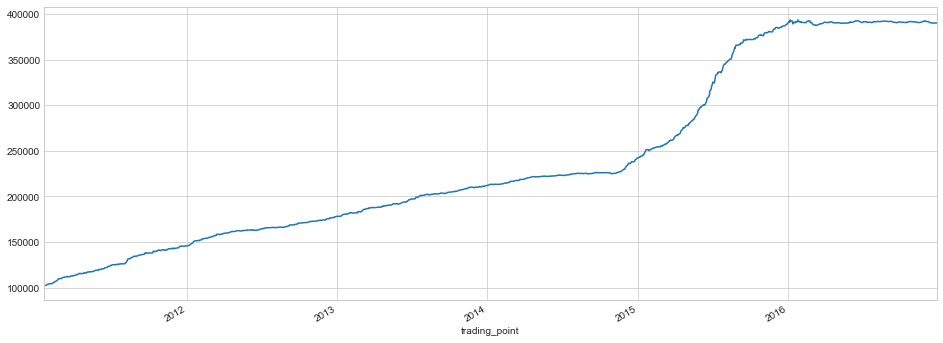

In [2]:
agent.restore_model()
state = env.reset()
for i in range(1445):
    action = agent.get_deterministic_policy(state)
    next_state, reward, done = env.step(action)
    state = next_state

tmp = env.plot_data()
tmp.iloc[:, 0].plot(figsize=(16, 6))

胜率: 0.4834710743801653


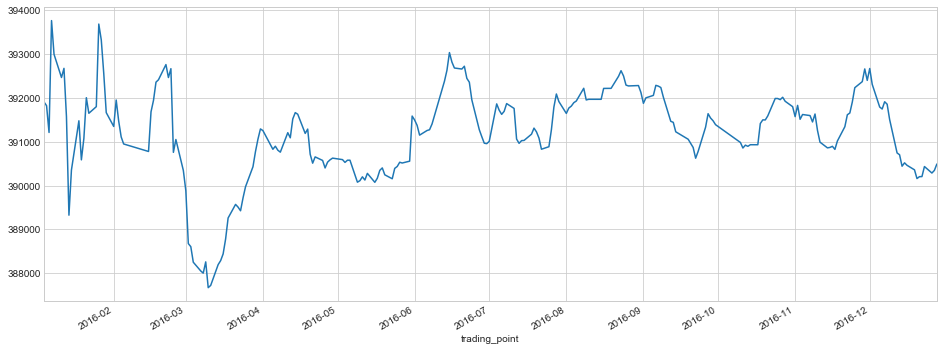

In [3]:
tmp.iloc[1203:, 0].plot(figsize=(16, 6))

test_data = tmp.iloc[1203:]
ratio = np.sum(np.maximum(np.sign(test_data['reward']), 0))/test_data.shape[0]
print("胜率:", ratio)